In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import random
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Importing the dataset
train_data = pd.read_csv("train_file.csv")
train_data.head()

F:\Installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
train_data.shape

(85895, 32)

In [4]:
# Importing the dataset
test_data = pd.read_csv("test_file.csv")
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [5]:
test_data.shape

(57239, 31)

In [6]:
# Check for any other unusable (NaN) values
print(pd.isnull(train_data).sum())

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [7]:
# Check for any other unusable (NaN) values
print(pd.isnull(test_data).sum())

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [8]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [9]:
my_submission['ID'].count()

57239

In [10]:
my_submission.shape

(57239, 1)

In [11]:
train_data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype='object')

In [12]:
# Studying the target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

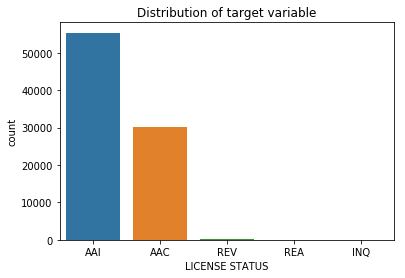

In [13]:
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

In [14]:
# Identifying the unique number of values in the dataset
train_data.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [15]:
# Dropping columns which will be of no use for our model

train_data = train_data.drop(['LICENSE ID'], axis = 1)
test_data = test_data.drop(['LICENSE ID'], axis = 1)

train_data = train_data.drop(['ID'], axis = 1)
test_data = test_data.drop(['ID'], axis = 1)

train_data = train_data.drop(['ADDRESS'], axis = 1)
test_data = test_data.drop(['ADDRESS'], axis = 1)

train_data = train_data.drop(['STATE'], axis = 1)
test_data = test_data.drop(['STATE'], axis = 1)

train_data = train_data.drop(['LICENSE NUMBER'], axis = 1)
test_data = test_data.drop(['LICENSE NUMBER'], axis = 1)

train_data = train_data.drop(['APPLICATION CREATED DATE'], axis = 1)
test_data = test_data.drop(['APPLICATION CREATED DATE'], axis = 1)

train_data = train_data.drop(['LOCATION'], axis = 1)
test_data = test_data.drop(['LOCATION'], axis = 1)

train_data = train_data.drop(['LICENSE STATUS CHANGE DATE'], axis = 1)
test_data = test_data.drop(['LICENSE STATUS CHANGE DATE'], axis = 1)

train_data = train_data.drop(['WARD PRECINCT'], axis = 1)
test_data = test_data.drop(['WARD PRECINCT'], axis = 1)

train_data = train_data.drop(['LATITUDE'], axis = 1)
test_data = test_data.drop(['LATITUDE'], axis = 1)

train_data = train_data.drop(['LONGITUDE'], axis = 1)
test_data = test_data.drop(['LONGITUDE'], axis = 1)

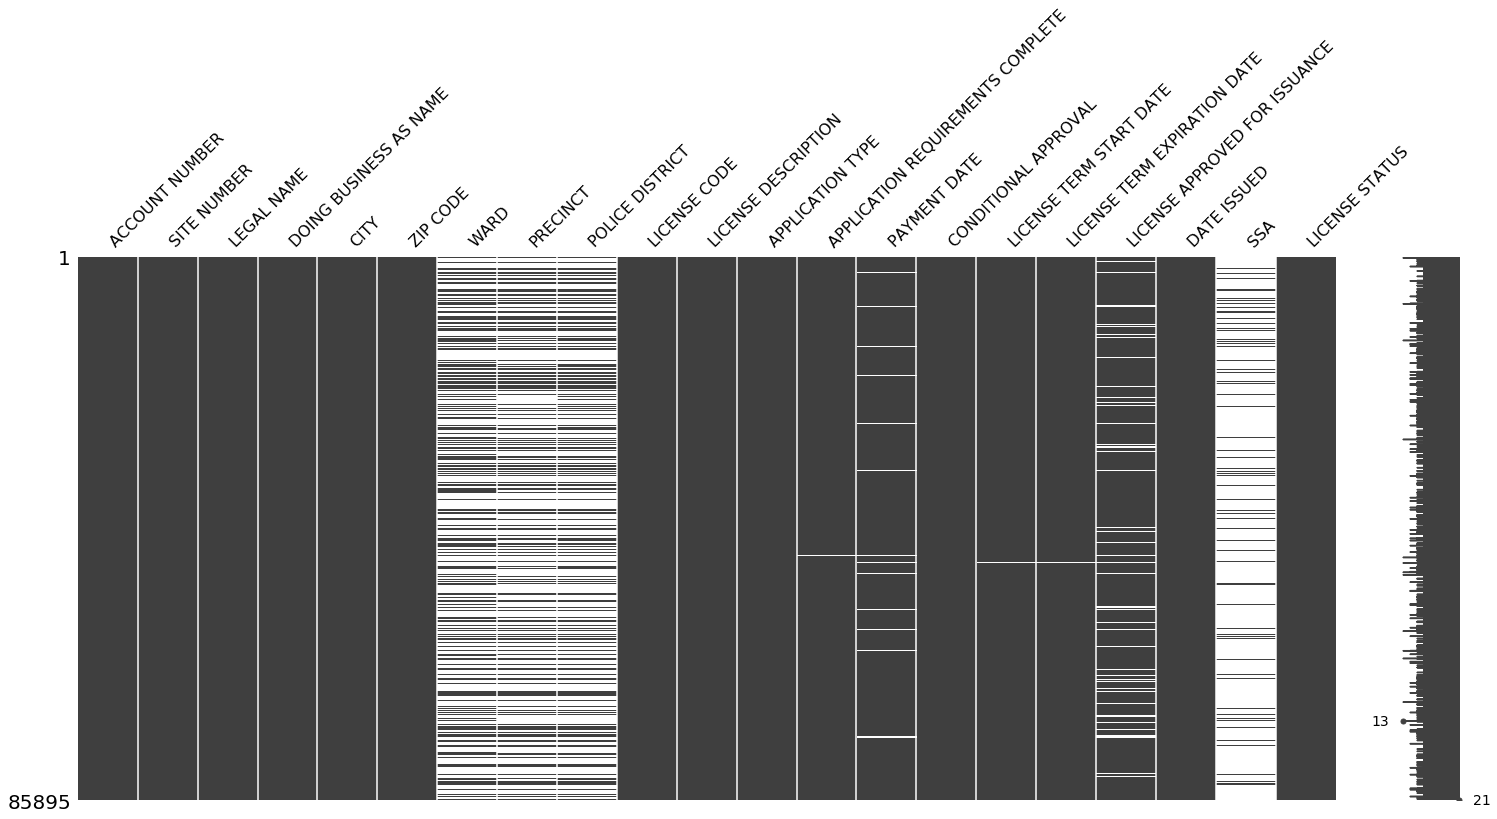

In [16]:
import missingno as msno
# Missing data in form of white lines 
msno.matrix(train_data)
plt.show()

In [17]:
train_data['PAYMENT DATE'] = pd.to_datetime(train_data['PAYMENT DATE'])
train_data['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(train_data['APPLICATION REQUIREMENTS COMPLETE'])
train_data['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(train_data['LICENSE TERM EXPIRATION DATE'])
train_data['LICENSE TERM START DATE'] = pd.to_datetime(train_data['LICENSE TERM START DATE'])
train_data['DATE ISSUED'] = pd.to_datetime(train_data['DATE ISSUED'])
train_data['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(train_data['LICENSE APPROVED FOR ISSUANCE'])

In [18]:
test_data['PAYMENT DATE'] = pd.to_datetime(test_data['PAYMENT DATE'])
test_data['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(test_data['APPLICATION REQUIREMENTS COMPLETE'])
test_data['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(test_data['LICENSE TERM EXPIRATION DATE'])
test_data['LICENSE TERM START DATE'] = pd.to_datetime(test_data['LICENSE TERM START DATE'])
test_data['DATE ISSUED'] = pd.to_datetime(test_data['DATE ISSUED'])
test_data['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(test_data['LICENSE APPROVED FOR ISSUANCE'])

In [19]:
train_data['PAYMENT YEAR'] = train_data['PAYMENT DATE'].apply(lambda x: x.year)

In [20]:
test_data['PAYMENT YEAR'] = test_data['PAYMENT DATE'].apply(lambda x: x.year)

In [21]:
train_data = train_data.drop(['PAYMENT DATE'], axis = 1)

In [22]:
test_data = test_data.drop(['PAYMENT DATE'], axis = 1)

In [23]:
train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = train_data['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)

In [24]:
test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = test_data['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)

In [25]:
train_data = train_data.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)

In [26]:
test_data = test_data.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)

In [27]:
train_data['DATE ISSUED YEAR'] = train_data['DATE ISSUED'].apply(lambda x: x.year)

In [28]:
test_data['DATE ISSUED YEAR'] = test_data['DATE ISSUED'].apply(lambda x: x.year)

In [29]:
train_data = train_data.drop(['DATE ISSUED'], axis = 1)

In [30]:
test_data = test_data.drop(['DATE ISSUED'], axis = 1)

In [31]:
train_data['LICENSE TERM EXPIRATION YEAR'] = train_data['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)
train_data['LICENSE TERM START YEAR'] = train_data['LICENSE TERM START DATE'].apply(lambda x: x.year)

In [32]:
test_data['LICENSE TERM EXPIRATION YEAR'] = test_data['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)
test_data['LICENSE TERM START YEAR'] = test_data['LICENSE TERM START DATE'].apply(lambda x: x.year)

In [33]:
train_data['LICENSE TERM EXPIRATION YEAR'] = train_data['LICENSE TERM EXPIRATION YEAR'].fillna(round(train_data['LICENSE TERM EXPIRATION YEAR'].mean()))

In [34]:
test_data['LICENSE TERM EXPIRATION YEAR'] = test_data['LICENSE TERM EXPIRATION YEAR'].fillna(round(test_data['LICENSE TERM EXPIRATION YEAR'].mean()))

In [35]:
train_data['LICENSE TERM START YEAR'] = train_data['LICENSE TERM START YEAR'].fillna(round(train_data['LICENSE TERM START YEAR'].mean()))

In [36]:
test_data['LICENSE TERM START YEAR'] = test_data['LICENSE TERM START YEAR'].fillna(round(test_data['LICENSE TERM START YEAR'].mean()))

In [37]:
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])

In [38]:
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [39]:
train_data = train_data.drop(['LICENSE TERM EXPIRATION DATE'], axis = 1)
train_data = train_data.drop(['LICENSE TERM EXPIRATION YEAR'], axis = 1)

In [40]:
test_data = test_data.drop(['LICENSE TERM EXPIRATION DATE'], axis = 1)
test_data = test_data.drop(['LICENSE TERM EXPIRATION YEAR'], axis = 1)

In [41]:
train_data = train_data.drop(['LICENSE TERM START DATE'], axis = 1)
train_data = train_data.drop(['LICENSE TERM START YEAR'], axis = 1)

In [42]:
test_data = test_data.drop(['LICENSE TERM START DATE'], axis = 1)
test_data = test_data.drop(['LICENSE TERM START YEAR'], axis = 1)

In [43]:
train_data['LICENSE APPROVED YEAR'] = train_data['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [44]:
test_data['LICENSE APPROVED YEAR'] = test_data['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [45]:
train_data = train_data.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)

In [46]:
test_data = test_data.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)

In [47]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0


In [48]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].fillna('None')
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].fillna('None')

In [49]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].fillna('None')
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].fillna('None')

In [50]:
train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0


In [51]:
test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0
3,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN
4,283018,3,MARINCA A. COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0


In [52]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [53]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [54]:
train_data['LEGAL TYPE'] = 'PVT'
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,PVT
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,PVT
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,PVT
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [55]:
test_data['LEGAL TYPE'] = 'PVT'
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,PVT
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,PVT
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,PVT
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,PVT


In [56]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,PVT
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [57]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,PVT
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,PVT
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,INC


In [58]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,PVT
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [59]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,LLC
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,INC


In [60]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,CORP
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [61]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,CORP
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,CORP


In [62]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,CORP
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [63]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,CORP
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,CORP


In [64]:
train_data['LEGAL TYPE'].value_counts()

CORP    27765
PVT     27020
INC     24447
LLC      5048
LTD      1615
Name: LEGAL TYPE, dtype: int64

In [65]:
train_data = train_data.drop(['LEGAL NAME'], axis = 1)
train_data = train_data.drop(['DOING BUSINESS AS NAME'], axis = 1)

In [66]:
test_data = test_data.drop(['LEGAL NAME'], axis = 1)
test_data = test_data.drop(['DOING BUSINESS AS NAME'], axis = 1)

In [67]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,CORP
4,213785,1,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [68]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        50078
Home Repair                                                     10633
Peddler                                                          3782
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1952
Street Performer                                                 1889
Scavenger, Private                                               1549
Motor Vehicle Repair                                             1534
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Automatic Amusement Device Operator                               773
Mobile Food Dispenser                                             525
Day Care Center                                                   522
Manufacturing Establ

In [69]:
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Peddler                                                          1208
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Regulated Business License                                       1089
Day Care Center                                                   730
Manufacturing Establishments                                      639
Massage Therapist                                                 569
Broker                                                            498
Residential Real Est

In [70]:
train_data['APPLICATION TYPE'].value_counts()

RENEW     61085
ISSUE     23398
C_LOC      1400
C_CAPA        7
C_EXPA        5
Name: APPLICATION TYPE, dtype: int64

In [71]:
train_data['CONDITIONAL APPROVAL'].value_counts()

N    85877
Y       18
Name: CONDITIONAL APPROVAL, dtype: int64

In [72]:
train_data.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
CITY                                          0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       76446
LICENSE STATUS                                0
PAYMENT YEAR                               1289
APPLICATION REQUIREMENTS COMPLETE YEAR      214
DATE ISSUED YEAR                              0
LICENSE VALIDITY                              0
LICENSE APPROVED YEAR                      6789
LEGAL TYPE                                    0
dtype: int64

In [73]:
train_data.dtypes

ACCOUNT NUMBER                              int64
SITE NUMBER                                 int64
CITY                                       object
ZIP CODE                                   object
WARD                                      float64
PRECINCT                                  float64
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
SSA                                       float64
LICENSE STATUS                             object
PAYMENT YEAR                              float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
DATE ISSUED YEAR                            int64
LICENSE VALIDITY                          float64
LICENSE APPROVED YEAR                     float64
LEGAL TYPE                                 object
dtype: object

In [74]:
train_data['ZIP CODE'] = train_data['ZIP CODE'].fillna('None')
test_data['ZIP CODE'] = test_data['ZIP CODE'].fillna('None')

In [75]:
train_data['WARD'] = train_data['WARD'].fillna(random.randint(1,47))
test_data['WARD'] = test_data['WARD'].fillna(random.randint(1,47))

In [76]:
train_data['PRECINCT'] = train_data['PRECINCT'].fillna(random.randint(1,76))
test_data['PRECINCT'] = test_data['PRECINCT'].fillna(random.randint(1,76))

In [77]:
train_data['POLICE DISTRICT'] = train_data['POLICE DISTRICT'].fillna(random.randint(1,25))
test_data['POLICE DISTRICT'] = test_data['POLICE DISTRICT'].fillna(random.randint(1,25))

In [78]:
train_data['SSA'] = train_data['SSA'].fillna(random.randint(1,69))
test_data['SSA'] = test_data['SSA'].fillna(random.randint(1,69))

In [79]:
train_data['PAYMENT YEAR'] = train_data['PAYMENT YEAR'].fillna(round(train_data['PAYMENT YEAR'].mean()))
test_data['PAYMENT YEAR'] = test_data['PAYMENT YEAR'].fillna(round(test_data['PAYMENT YEAR'].mean()))

In [80]:
train_data['LICENSE APPROVED YEAR'] = train_data['LICENSE APPROVED YEAR'].fillna(round(train_data['LICENSE APPROVED YEAR'].mean()))
test_data['LICENSE APPROVED YEAR'] = test_data['LICENSE APPROVED YEAR'].fillna(round(test_data['LICENSE APPROVED YEAR'].mean()))

In [81]:
train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))
test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))

In [82]:
train_data.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
SSA                                       0
LICENSE STATUS                            0
PAYMENT YEAR                              0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
DATE ISSUED YEAR                          0
LICENSE VALIDITY                          0
LICENSE APPROVED YEAR                     0
LEGAL TYPE                                0
dtype: int64

In [93]:
test_data.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
SSA                                       0
PAYMENT YEAR                              0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
DATE ISSUED YEAR                          0
LICENSE VALIDITY                          0
LICENSE APPROVED YEAR                     0
LEGAL TYPE                                0
dtype: int64

In [94]:
train_data.shape

(85895, 19)

In [95]:
test_data.shape

(57239, 18)

In [98]:
train_data.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'ZIP CODE', 'WARD', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'APPLICATION TYPE', 'CONDITIONAL APPROVAL', 'SSA', 'LICENSE STATUS', 'PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'DATE ISSUED YEAR', 'LICENSE VALIDITY', 'LICENSE APPROVED YEAR', 'LEGAL TYPE'], dtype='object')

In [99]:
train_data.dtypes

ACCOUNT NUMBER                              int64
SITE NUMBER                                 int64
CITY                                       object
ZIP CODE                                   object
WARD                                      float64
PRECINCT                                  float64
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
SSA                                       float64
LICENSE STATUS                             object
PAYMENT YEAR                              float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
DATE ISSUED YEAR                            int64
LICENSE VALIDITY                          float64
LICENSE APPROVED YEAR                     float64
LEGAL TYPE                                 object
dtype: object

In [102]:
encoder = LabelEncoder()
train_data["CITY"] = encoder.fit_transform(train_data["CITY"])
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
train_data["LICENSE DESCRIPTION"] = encoder.fit_transform(train_data["LICENSE DESCRIPTION"])
train_data["APPLICATION TYPE"] = encoder.fit_transform(train_data["APPLICATION TYPE"])
train_data["CONDITIONAL APPROVAL"] = encoder.fit_transform(train_data["CONDITIONAL APPROVAL"])
train_data["LICENSE STATUS"] = encoder.fit_transform(train_data["LICENSE STATUS"])
train_data["LEGAL TYPE"] = encoder.fit_transform(train_data["LEGAL TYPE"])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,193,1559,22.0,28.0,10.0,1010,41,4,0,25.0,1,2002.0,2002.0,2006,1.0,2002.0,4
1,262311,29,193,1548,33.0,23.0,17.0,1315,46,4,0,60.0,0,2005.0,2005.0,2006,1.0,2006.0,1
2,345008,1,466,1025,44.0,39.0,1.0,1011,30,3,0,68.0,1,2009.0,2009.0,2009,2.0,2009.0,1
3,273121,1,585,1329,44.0,39.0,1.0,1010,41,3,0,68.0,1,2004.0,2004.0,2004,1.0,2004.0,0
4,213785,1,1145,1095,44.0,39.0,1.0,1010,41,4,0,68.0,1,2008.0,2008.0,2008,2.0,2008.0,4


In [104]:
encoder = LabelEncoder()
test_data["CITY"] = encoder.fit_transform(test_data["CITY"])
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))
test_data["LICENSE DESCRIPTION"] = encoder.fit_transform(test_data["LICENSE DESCRIPTION"])
test_data["APPLICATION TYPE"] = encoder.fit_transform(test_data["APPLICATION TYPE"])
test_data["CONDITIONAL APPROVAL"] = encoder.fit_transform(test_data["CONDITIONAL APPROVAL"])
test_data["LEGAL TYPE"] = encoder.fit_transform(test_data["LEGAL TYPE"])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,59,174,42.0,67.0,18.0,1020,82,5,0,34.0,2012.0,2011.0,2012,2.0,2012.0,2
1,65043,1,59,202,16.0,5.0,7.0,1010,48,5,0,34.0,2012.0,2011.0,2012,2.0,2012.0,1
2,281270,1,59,169,4.0,8.0,1.0,1020,82,5,0,34.0,2004.0,2004.0,2004,1.0,2004.0,0
3,335243,1,59,237,9.0,33.0,5.0,1607,70,5,0,34.0,2010.0,2010.0,2010,2.0,2008.0,4
4,283018,3,59,197,15.0,26.0,9.0,1010,48,5,0,39.0,2007.0,2007.0,2007,2.0,2007.0,0


In [85]:
# # Spliting target variable and independent variables
# X = train_data.drop(['LICENSE STATUS'], axis = 1)
# y = train_data['LICENSE STATUS']

In [83]:
# Finding out the correlation between the features
corr = train_data.corr()
corr.shape

(12, 12)

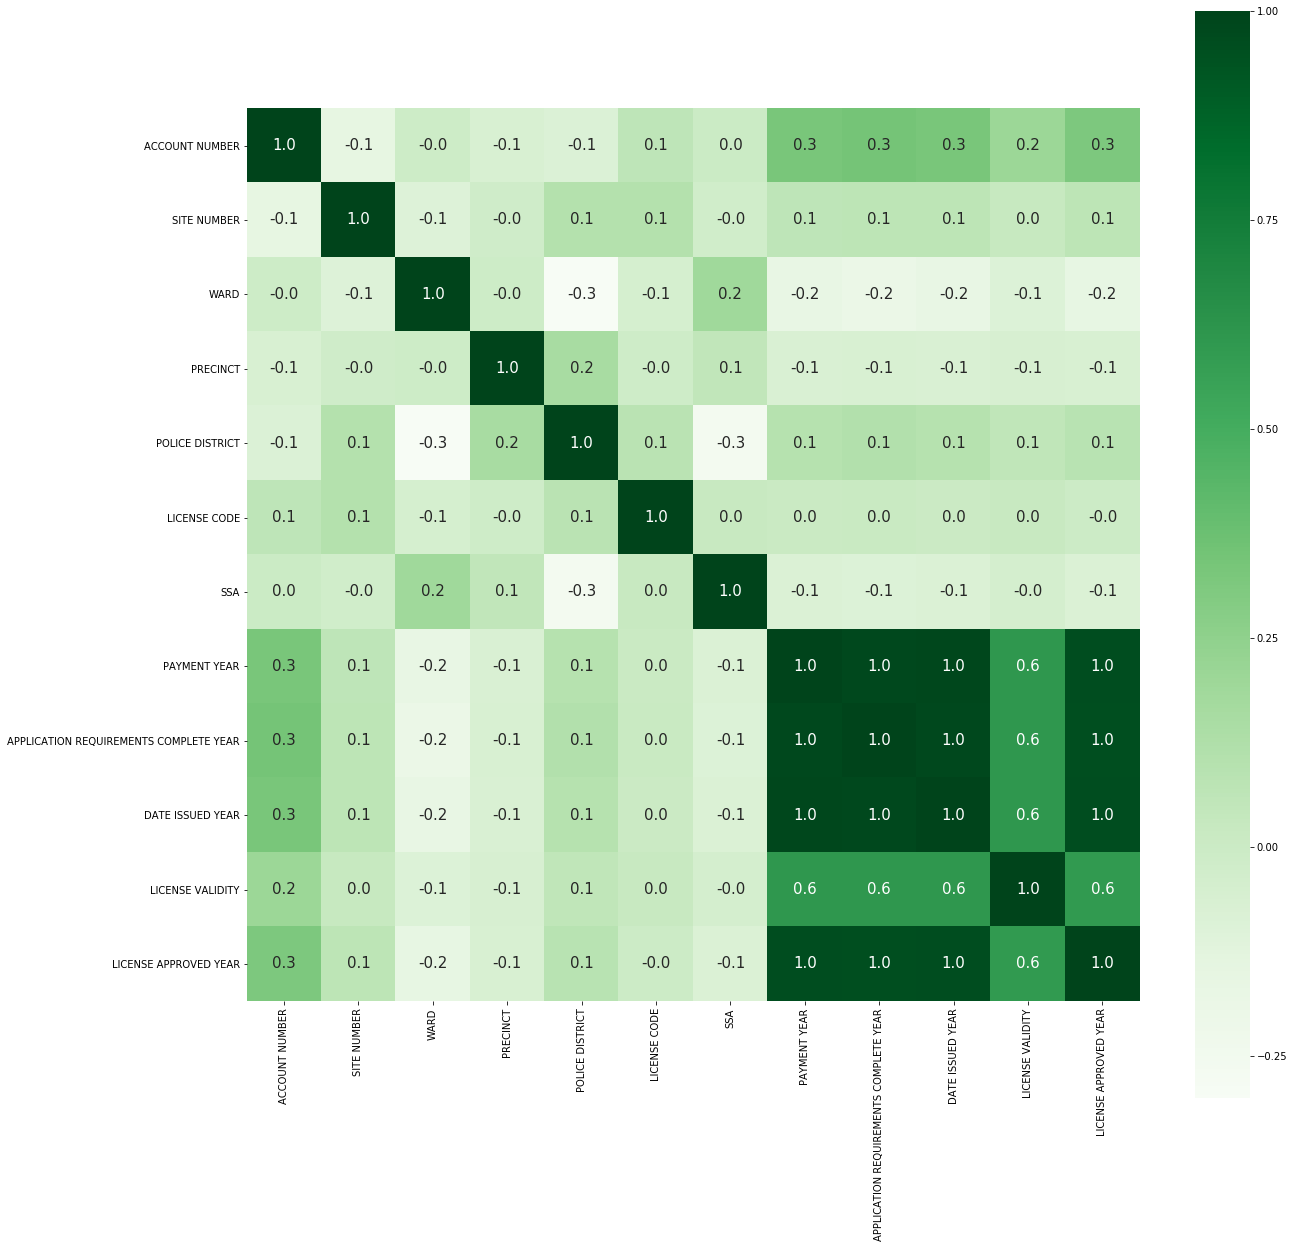

In [84]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [86]:
# # One hot encoding for categorical variables
# train_data = pd.get_dummies(train_data)
# train_data.head().T

In [87]:
# # Splitting the data into training set and testset
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0, stratify=y)

In [88]:
# # Logistic Regression

# # Import library for LogisticRegression
# from sklearn.linear_model import LogisticRegression

# # Create a Logistic regression classifier
# logreg = LogisticRegression()

# # Train the model using the training sets 
# logreg.fit(X_train, y_train)

In [89]:
# # Prediction on test data
# y_pred = logreg.predict(X_test)

In [90]:
# # Calculating the accuracy, precision and the recall
# acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
# print( 'Total Accuracy : ', acc_logreg )
# print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
# print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

In [91]:
# # Create confusion matrix function to find out sensitivity and specificity
# from sklearn.metrics import confusion_matrix
# def draw_cm(actual, predicted):
#     cm = confusion_matrix( actual, predicted, [1,0]).T
#     sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
#     plt.ylabel('Predicted')
#     plt.xlabel('Actual')
#     plt.show()

In [92]:
# # Confusion matrix 
# draw_cm(y_test, y_pred)